# Assignment 2

## Data Preparation

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data_pelatihan = pd.read_excel('./dataset/Feedback_Lat_2020.xlsx')
data_elearn = pd.read_excel('./dataset/ELearn_2020.xlsx')
data_feedback_elearn= pd.read_excel('./dataset/Feedback_ELearn_2020.xlsx')

In [3]:
data_pelatihan.head()

,Nama Pelatihan,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
0,Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Business Analytics Amoeba,80114280,LAT,Video Learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Online UX Design Course Amoeba,80114281,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_pelatihan.set_index('Nama Pelatihan', inplace=True)
data_pelatihan.head()

,Objid Pelatihan,Category,Tipe,Lokasi Pelatihan,Provider,Academy Event,Location,Provider Category,Event Type,Status,...,UBPP Akom,UBPP Sarana,UBPP Laborat,UBPP Penyelenggaraan,UBPP Kafetaria,UBPP Materi,Net Promotor Score,Customer Satisfaction,First Response & Average Handling,Customer Effort Score
Nama Pelatihan,,,,,,,,,,,,,,,,,,,,,
Social Media Ads & Analytic,80114181,LAT,NaN,Bandung,Learning Area 2 Jakarta,CONSUMER,Online (Lokasi Masing-Masing),Internal,Internal,On Going,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CISM,80114269,LAT,Virtual Classroom,Bandung,Learning Area 3 / LO,NITS,Online (Lokasi Masing-Masing),NaN,Public,On Going,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Programmer Development Course Amoeba,80114271,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Business Analytics Amoeba,80114280,LAT,Video Learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Online UX Design Course Amoeba,80114281,LAT,E-learning,Bandung,Learning Area 7 Makassar,DSP,Online (Lokasi Masing-Masing),Internal,Internal,WO,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
dt_peserta = data_pelatihan['JML Peserta']
dt_peserta.head()

Nama Pelatihan
Social Media Ads & Analytic             28
CISM                                     4
Programmer Development Course Amoeba     1
Business Analytics Amoeba                1
Online UX Design Course Amoeba           1
Name: JML Peserta, dtype: int64

In [6]:
dt_NPS = data_pelatihan['Net Promotor Score']
dt_NPS.head()

Nama Pelatihan
Social Media Ads & Analytic             0.0
CISM                                    0.0
Programmer Development Course Amoeba    0.0
Business Analytics Amoeba               0.0
Online UX Design Course Amoeba          0.0
Name: Net Promotor Score, dtype: float64

## Measure of Central Tendency: Mean

In [7]:
mean_ = np.mean(dt_peserta)
mean_

32.16318785578748

In [8]:
meanNPS = dt_NPS.mean()
dt_NPS.mean()

39.36956356736245

In [9]:
# Harmonic Mean
scipy.stats.hmean(dt_peserta)

0.0

## Measure of Central Tendency: Median

In [10]:
median_ = np.median(dt_peserta)
median_

9.0

In [11]:
dt_NPS.median()

42.86

## Measure of Central Tendency: Modus

In [12]:
scipy.stats.mode(dt_peserta)

ModeResult(mode=array([0], dtype=int64), count=array([278]))

In [13]:
scipy.stats.mode(dt_NPS)

ModeResult(mode=array([0.]), count=array([693]))

## Measure of Spread : Range 

In [14]:
np.ptp(dt_peserta)

1576

In [15]:
np.ptp(dt_NPS)

200.0

## Measure of Spread : Variance 

In [16]:
np.var(dt_peserta, ddof=1)

8844.329049071512

In [17]:
dt_NPS.var(ddof=1)

1657.2540787334851

## Measure of Spread : Standard Deviation 

In [18]:
sd_peserta = np.std(dt_peserta, ddof=1)
np.std(dt_peserta, ddof=1)

94.0442930170221

In [19]:
sdNPS = dt_NPS.std(ddof=1)
dt_NPS.std(ddof=1)

40.70938563443921

In [20]:
resultpeserta = dt_peserta.describe()
resultpeserta

count    1581.000000
mean       32.163188
std        94.044293
min         0.000000
25%         1.000000
50%         9.000000
75%        29.000000
max      1576.000000
Name: JML Peserta, dtype: float64

In [21]:
resultNPS = dt_NPS.describe()
resultNPS

count    1581.000000
mean       39.369564
std        40.709386
min      -100.000000
25%         0.000000
50%        42.860000
75%        75.000000
max       100.000000
Name: Net Promotor Score, dtype: float64

## Probability Distribution

In [22]:
sns.set(rc={'figure.figsize':(5, 5)})

%matplotlib inline

In [23]:
from scipy.stats import norm

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

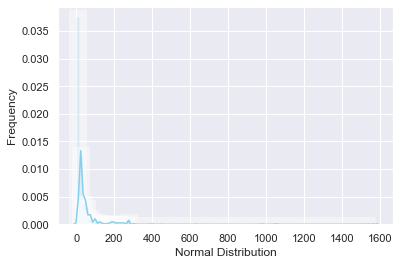

In [24]:
ax = sns.distplot(dt_peserta,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth':15})

ax.set(xlabel='Normal Distribution',
      ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

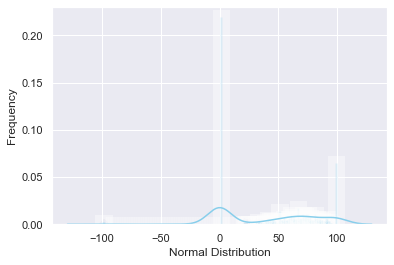

In [25]:
ax = sns.distplot(dt_NPS,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 hist_kws={'linewidth':15})

ax.set(xlabel='Normal Distribution',
      ylabel='Frequency')

## Confidence Intervals

In [26]:
np.size(dt_peserta) 

1581

In [27]:
np.size(dt_NPS)

1581

In [28]:
# Data Peserta
mean = 32.163
sd = 94.044
n = 1581
z = 1.96

In [29]:
se = sd_peserta / np.sqrt(n)

In [30]:
low = mean - z * se
hi = mean + z * se

(low, hi)

(27.527222509873994, 36.798777490126)

Hal ini berarti nilai CI Jumlah peserta berada di antara 27,5 hingga 36,7

In [31]:
# Data NPS
mean = 39.369
sd = 40.709
n = 1581
z = 1.96

In [32]:
se = sd_peserta / np.sqrt(n)

In [33]:
low = mean - z * se
hi = mean + z * se

(low, hi)

(34.733222509874, 44.004777490126)

Hal ini berarti nilai CI NPS berada di antara 34,7 hingga 44,0

## Hypotesis Testing

Kita akan menguji hipotesis apabila ada perbedaan mean antara academy DSP dan NITS
Mean1 = Mean DSP
Mean2 = Mean NITS

H0 : Mean 1 == Mean 2

H1 : Mean 1 =/= Mean 2

In [34]:
DA = data_pelatihan[['Academy Event', 'Net Promotor Score']]
DA.head()

,Academy Event,Net Promotor Score
Nama Pelatihan,,
Social Media Ads & Analytic,CONSUMER,0.0
CISM,NITS,0.0
Programmer Development Course Amoeba,DSP,0.0
Business Analytics Amoeba,DSP,0.0
Online UX Design Course Amoeba,DSP,0.0


In [35]:
DA.set_index('Academy Event', inplace = True)
DA.head()

,Net Promotor Score
Academy Event,
CONSUMER,0.0
NITS,0.0
DSP,0.0
DSP,0.0
DSP,0.0


In [36]:
hypo1 = DA.loc['DSP']
hypo2 = DA.loc['NITS']

In [37]:
np.size(hypo1)

323

In [38]:
np.size(hypo2)

173

In [39]:
n_hypo1 = 323
mean_DSP = hypo1.mean()
std_DSP = np.std(hypo1, ddof = 1)
print('DSP : ', n_hypo1, mean_DSP, std_DSP)

DSP :  323 Net Promotor Score    51.511796
dtype: float64 Net Promotor Score    46.894672
dtype: float64


In [40]:
n_hypo2 = 3071
mean_NITS = hypo2.mean()
std_NITS = np.std(hypo2, ddof = 1)
print('NITS: ', n_hypo2, mean_NITS, std_NITS)

NITS:  3071 Net Promotor Score    53.92185
dtype: float64 Net Promotor Score    40.051476
dtype: float64


In [41]:
sm.stats.ztest(hypo1.dropna(),
hypo2.dropna(), alternative = 'two-sided')

(array([-0.57315392]), array([0.56654048]))

Dilihat dari hasil maka, maka reject the Null Hypothesis sehingga ada perbedaan mean antara DSP dan NITS